In [ ]:
import numpy as np
import torch
import os

path = "D:\One_한양대학교\private object minsu\coding\data\samsung_2024\\nback_segmented_v3"
fs = 125
epoch_len = 5 * fs
overlap_len = 0 * fs
rejection = True

chan_selection = [[0,8],[0,3],[3,6],[6,8]]
nback = [0,2]

c = 1

data = {}
label = {}
for i in range(len(nback)):
    path_folder = os.path.join(path,f"{nback[i]}_back")
    datalist = os.listdir(path_folder)
    data_subj = []
    iteration = 0
    subj = 0
    for path_dat in datalist:
        iteration += 1
        # data.append(np.load(os.path.join(path_folder, path_dat)))
        dat = np.load(os.path.join(path_folder, path_dat))[chan_selection[c][0]:chan_selection[c][1]]
        assert dat.shape[-1] >= epoch_len, 'there is data that is shorter than designated epoch length'

        for t in range(dat.shape[1] - epoch_len, 0, -(epoch_len-overlap_len)):
            temp = dat[:,t:t+epoch_len]
            if rejection:
                if np.max(abs(temp)) <= 100:
                    data_subj.append(temp)
            else:
                data_subj.append(temp)

        if iteration == 3:
            iteration = 0
            if data_subj != []:
                # data.append(np.stack(data_subj,0))
                if subj in data.keys():
                    # print(np.concatenate(data[subj], np.stack(data_subj,0)).shape)
                    data[subj] = np.concatenate([data[subj], np.stack(data_subj,0)])
                    label[subj] = np.concatenate([label[subj], np.ones((len(data_subj),)) * i])
                else:
                    data[subj] = np.stack(data_subj,0)
                    label[subj] = np.ones((len(data_subj),)) * i
                data_subj = []
            subj += 1



S06_T03_0_back.npy
S16_T03_0_back.npy
S18_T03_0_back.npy
S03_T03_2_back.npy
S06_T03_2_back.npy
S08_T03_2_back.npy
S15_T03_2_back.npy
S16_T03_2_back.npy
S18_T03_2_back.npy
S26_T03_2_back.npy
S28_T03_2_back.npy


In [123]:
label

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 1: array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 2: array([0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 0., 0., 1.]),
 4: array([0., 0., 1.]),
 6: array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]),
 7: array([0., 0., 0., 0.]),
 8: array([0., 0., 0., 0., 1., 1.]),
 9: array([0., 0., 0., 1.]),
 10: array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]),
 11: array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]),
 12: array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 13: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]),
 14: array([0.]),
 16: array([0., 0., 0., 0., 0., 1., 1., 1.]),
 18: array([0., 0., 0., 0., 1., 1., 1.]),
 19: array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]),
 20: array([0., 0., 0., 1., 1.]),
 21: array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.]),
 22: array([0., 0., 0., 0.,

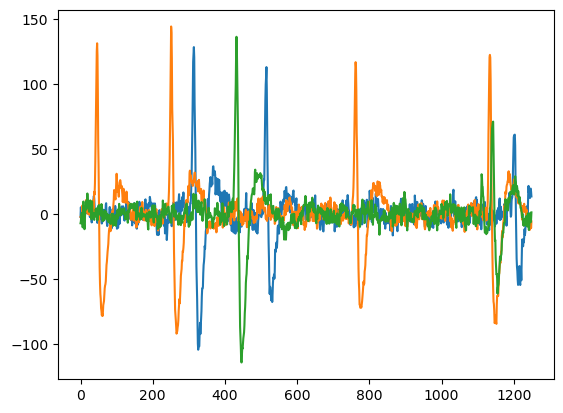

In [63]:
import matplotlib.pyplot as plt
# 6, 16, 18
i = 17
plt.plot(data[i][0,0])
plt.plot(data[i][1,0])
plt.plot(data[i][2,0])